### Top anime data 2025 dataset
    https://www.kaggle.com/datasets/wiltheman/anime-data-set-for-ml

1. ```df = pd.read_csv('top_anime_data.csv')```:

- O que faz: Carrega o seu arquivo de dados (o CSV baixado do Kaggle) para dentro do Python.

- Resultado: Cria um DataFrame (uma tabela organizada) chamado df que você pode manipular.

```df.head():```

- O que faz: Exibe as 5 primeiras linhas da sua tabela.

- Resultado: Serve para você dar uma "espiada" rápida nos dados e conferir se as colunas e valores foram carregados corretamente.

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('top_anime_data.csv')
df.head()

,title_english,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
0,One Piece,Currently Airing,0.0,PG-13 - Teens 13 or older,52.0,17,2548930,239752,8.73,1449377.0,"Action, Adventure, Fantasy",NaN,Shounen
1,Fullmetal Alchemist: Brotherhood,Finished Airing,64.0,R - 17+ (violence & profanity),2.0,3,3541474,234763,9.10,2228653.0,"Action, Adventure, Drama, Fantasy",Military,Shounen
2,Hunter x Hunter,Finished Airing,148.0,PG-13 - Teens 13 or older,8.0,8,3044411,221664,9.03,1889635.0,"Action, Adventure, Fantasy",NaN,Shounen
3,Steins;Gate,Finished Airing,24.0,PG-13 - Teens 13 or older,3.0,14,2712158,196685,9.07,1470722.0,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN
4,Attack on Titan,Finished Airing,25.0,R - 17+ (violence & profanity),117.0,1,4188784,181378,8.56,2952092.0,"Action, Award Winning, Drama, Suspense","Gore, Military, Survival",Shounen


```df.info():```

- O que faz: Exibe um resumo técnico da estrutura do seu DataFrame (a tabela de animes).

- Resultado: Você visualiza o total de linhas, o nome de cada coluna, a quantidade de valores preenchidos (não nulos) e o tipo de cada dado (se é número ou texto).

In [5]:

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_english  6700 non-null   str    
 1   status         10000 non-null  str    
 2   episodes       10000 non-null  float64
 3   rating         9857 non-null   str    
 4   rank           8287 non-null   float64
 5   popularity     10000 non-null  int64  
 6   members        10000 non-null  int64  
 7   favorites      10000 non-null  int64  
 8   score          9714 non-null   float64
 9   scored_by      9714 non-null   float64
 10  genres         9659 non-null   str    
 11  themes         6780 non-null   str    
 12  demographics   3122 non-null   str    
dtypes: float64(4), int64(3), str(6)
memory usage: 1.8 MB


### Indetificamos o tipo de data em cada coluna

In [6]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print(f'Colunas categoricas:\n{cat_col}\n')
print(f'Colunas numericas:\n{num_col}')

Colunas categoricas:
[]

Colunas numericas:
['title_english', 'status', 'episodes', 'rating', 'rank', 'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres', 'themes', 'demographics']


## Calculamos a percentagem de informacao faltando na base de dados

In [7]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

title_english    33.00
status            0.00
episodes          0.00
rating            1.43
rank             17.13
popularity        0.00
members           0.00
favorites         0.00
score             2.86
scored_by         2.86
genres            3.41
themes           32.20
demographics     68.78
dtype: float64

Podemos observar que a coluna de dados `title_english` tem uma percentagem de 33.00 de dados faltando, enquanto `status` tem toda a informacao necessaria.

`demographics` com `~69%` de faltando fica practicamente inutil, por isso vamos nos livrar desta coluna.

### Drop null columns


Para preservar a sua `dataframe` sempre faca uma copia da dataframe

In [9]:
df_clean = df

In [10]:
df_clean = df_clean.drop(columns = ['demographics'])

## Lidando com a data em falta

### Parte 1: Preenchimento de Texto ```(fillna('unknown'))```
 - O que faz: Substitui os valores vazios (NaN) nas colunas de título, temas e gêneros pela palavra "unknown" (desconhecido).

 - Resultado: Você evita erros de processamento e mantém essas linhas na análise, categorizando o que falta como "não identificado".

### Parte 2: Tratamento do Ranking e Popularidade
- O que faz: Preenche o Ranking com a média (mean) de todos os outros animes.

    - Preenche o Scored_by (quem votou) com o valor 0.

- Resultado: No Ranking, você usa um valor neutro (a média) para não distorcer o modelo; no Scored_by, assume-se que se não há dado, ninguém votou ainda.

### Parte 3: Tratamento do Rating (Classificação Etária)
 - O que faz: Identifica o valor mais frequente (moda/mode) da coluna (ex: "PG-13") e usa para preencher os vazios.

 - Resultado: Você completa os dados usando a classificação mais comum do seu dataset, mantendo a consistência estatística.

In [12]:
df_clean['title_english'] = df_clean['title_english'].fillna('unknown ')
df_clean['themes'] = df_clean['themes'].fillna('unknown')
df_clean['genres'] = df_clean['genres'].fillna('unknown')

rank_mean = df_clean['rank'].mean()
df_clean['rank'] = df_clean['rank'].fillna(rank_mean)
df_clean['scored_by'] = df_clean['scored_by'].fillna(0)
most_freq_rating = df_clean['rating'].mode()[0]
df_clean['rating'] = df_clean['rating'].fillna(most_freq_rating)

Sendo que `score` e o alvo do nosso estudo, a gender vai simplesmente remover os dados em falta.
preencher os dados de qualquer forma pode danificar a eficiencia do nosso modelo.

In [11]:
df_clean.dropna(subset=['score'], inplace=True)

In [13]:
round((df_clean.isnull().sum() / df.shape[0]) * 100, 2)

title_english    0.0
status           0.0
episodes         0.0
rating           0.0
rank             0.0
popularity       0.0
members          0.0
favorites        0.0
score            0.0
scored_by        0.0
genres           0.0
themes           0.0
dtype: float64

### Verificar a Correlação entre os dados

O nosso objectivo e encontrar a correlação entre:
- rank;
- popularity;
- favorites;
- score;
- scored_by;
- members:

### O que é Correlação?
- O que é: É uma medida estatística que indica o quanto duas variáveis "caminham juntas".

- Como funciona: O valor varia de -1 a 1:

    - `1 (Forte Positiva)`: Se uma aumenta, a outra aumenta na mesma proporção (ex: Renda e Gasto).

    - `-1 (Forte Negativa)`: Se uma aumenta, a outra diminui (ex: Faltas na escola e Nota final).

    - `0`: Não há relação aparente entre elas.

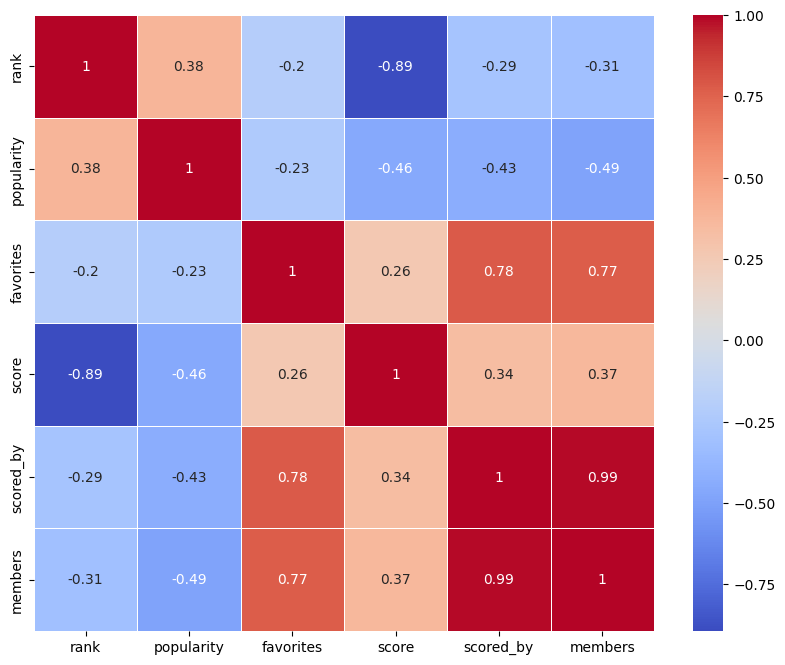

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "rank",
    "popularity",
    "favorites",
    'score', 
    'scored_by',
    "members"
]

corr_matrix = df_clean[columns].corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.show()

Como a correlação entre `scored_by` e `members` é muito alta, vamos somá-las em uma única variável e descartar as originais. É muito provável que, quanto mais membros um anime possui, mais pessoas votem em um positivo `score` nele.

In [14]:
df_clean['scored_by_members'] = (df_clean['scored_by'] + df_clean['members']) / 2
df_clean = df_clean.drop(columns = ['scored_by', 'members'])

# Standardizando a data

In [15]:
df_clean.head()

,title_english,status,episodes,rating,rank,popularity,favorites,score,genres,themes,scored_by_members
0,One Piece,Currently Airing,0.0,PG-13 - Teens 13 or older,52.0,17,239752,8.73,"Action, Adventure, Fantasy",unknown,1999153.5
1,Fullmetal Alchemist: Brotherhood,Finished Airing,64.0,R - 17+ (violence & profanity),2.0,3,234763,9.10,"Action, Adventure, Drama, Fantasy",Military,2885063.5
2,Hunter x Hunter,Finished Airing,148.0,PG-13 - Teens 13 or older,8.0,8,221664,9.03,"Action, Adventure, Fantasy",unknown,2467023.0
3,Steins;Gate,Finished Airing,24.0,PG-13 - Teens 13 or older,3.0,14,196685,9.07,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",2091440.0
4,Attack on Titan,Finished Airing,25.0,R - 17+ (violence & profanity),117.0,1,181378,8.56,"Action, Award Winning, Drama, Suspense","Gore, Military, Survival",3570438.0


**Coluna de episódios**: Parece que animes que ainda estão sendo exibidos (`status`) possuem uma contagem de `episódios` igual a 0. Vamos substituir esses zeros pelo valor médio da coluna de episódios.

### Resumo do que o código faz:
- O que faz: Identifica os valores `0` (que funcionam como "buracos" na lógica, já que nenhum anime tem zero episódios) e os troca pela média aritmética de episodios de todos os outros animes do dataset.

- Resultado: Você evita que o modelo de *Regressão Linear* seja enganado por valores irreais, garantindo que o "peso" da duração do anime na nota final seja baseado em uma estimativa estatística realista.

In [16]:
df_clean['status'] = (df_clean['status'] == 'Currently Airing').astype(int)
df_clean['episodes'] = df_clean['episodes'].replace(0, df_clean['episodes'].median())

- Genres - Serapara genros diferentes (One-Hot Encoding).

Sendo que um anime pode ter vários gêneros (ex: "Ação, Aventura, Sci-Fi"), não podemos tratá-los como uma única palavra.

- ```df_clean_2 = df_clean.copy()```:

    - O que faz: Cria uma cópia de segurança do seu DataFrame limpo.

    - Resultado: Você evita alterar os dados originais enquanto faz experimentos com novas colunas.

- ```...str.lower().str.strip()```:

    - O que faz: Padroniza o texto dos gêneros para letras minúsculas e remove espaços em branco extras no início e no fim.

    - Resultado: Garante que "Ação" e " ação" sejam lidos como a mesma coisa pelo modelo.

- ```...str.split(',').apply(...)```:

    - O que faz: Quebra a string única de gêneros em uma lista de palavras separadas pela vírgula e remove a palavra "unknown" que adicionamos antes.

    - Resultado: Cria uma nova coluna onde cada linha contém uma lista de gêneros limpos, pronta para ser transformada em colunas individuais (o que chamamos de *One-Hot Encoding*).
    
- ```mlb = MultiLabelBinarizer():```

    - O que faz: Cria uma ferramenta que consegue ler listas (como a sua genre_list) e criar uma coluna para cada gênero único que encontrar.

- ``` encoded_genres = mlb.fit_transform(...)```:

    - O que faz: Transforma as listas de gêneros em uma matriz de zeros e uns.

    - Resultado: Se um anime for de "Ação" e "Aventura", ele ganha o número 1 nas colunas de Ação e Aventura, e 0 em todas as outras.

- ```pd.DataFrame(..., columns=mlb.classes_)```:

    - O que faz: Transforma essa matriz de números em uma tabela organizada, onde o nome de cada coluna é o nome do gênero (Ex: Action, Comedy, Drama).

- ```df_clean_2.join(encoded_df)```:

    - O que faz: Une essa nova tabela de gêneros binários ao seu dataset principal.

- ```df_clean.drop(...)```:

    - O que faz: Remove as colunas de texto originais (genres e genre_list), que agora são inúteis para o modelo.


In [17]:
df_clean_2 = df_clean.copy()

df_clean_2['genres'] = df_clean_2['genres'].str.lower().str.strip()

df_clean_2['genre_list'] = df_clean_2['genres'].str.split(',').apply(
    lambda x: [i.strip() for i in x if i.strip() != 'unknown']
)

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(df_clean_2['genre_list'])

encoded_df = pd.DataFrame(encoded_genres, columns=mlb.classes_, index=df_clean_2.index)
df_clean = df_clean_2.join(encoded_df)
df_clean = df_clean.drop(columns = ['genres', 'genre_list'])

- Themes - faremoz o mesmo para os temas dos animes.

In [19]:
df_clean_2 = df_clean.copy()

df_clean_2['theme_list'] = df_clean_2['themes'].str.lower().str.strip()

df_clean_2['theme_list'] = df_clean_2['theme_list'].str.split(',').apply(
    lambda x: [i.strip() for i in x if i.strip() != 'unknown']
)

encoded_themes = mlb.fit_transform(df_clean_2['theme_list'])
theme_columns = [f'theme_{cls}' for cls in mlb.classes_]
encoded_df = pd.DataFrame(encoded_themes, columns=theme_columns, index=df_clean_2.index)
df_clean = df_clean_2.join(encoded_df)
df_clean = df_clean.drop(columns = ['themes', 'theme_list'])

- rating - strip o texto extra acerca dos ratings, `PG-13 - teens 13 or older` deve ser somente `PG-13`

O motivo pelo qual fazemos isso - é reduzir a complexidade da coluna de classificação etária para que o modelo não trate descrições longas como categorias diferentes.

In [20]:
df_clean['rating'] = df_clean['rating'].str.replace(r'\(.*\)', '', regex=True)

df_clean['rating'] = df_clean['rating'].str.split(' - ').str[0].str.strip()

mapping = {
    '17+': 'R',
    'All Ages': 'G',
    'Children': 'PG',
    'Teens 13 or older': 'PG-13',
    'Mild Nudity': 'R+'
}
df_clean['rating'] = df_clean['rating'].replace(mapping)

print("Cleaned Ratings:", df_clean['rating'].unique())

Cleaned Ratings: ['PG-13' 'R' 'R+' 'PG' 'G' 'Rx']


In [21]:
df_clean.to_csv('anime_data_clean.csv', index=False)

print("Arquivo salvo com sucesso como 'anime_data_clean.csv'")

Arquivo salvo com sucesso como 'anime_data_clean.csv'
